# Backtesting of Contrarian & Momentum Trading Strategies with multiple stocks

(for implementation with IBKR, see Part 1: Keystone Project Trading)

__Strategy Backtesting__: Simulate the Strategy with __historical data__ and measure the __performance__.

__Possible Backtesting Outcomes__:
- low/no profitability -> __Reject Strategy__
- moderate/high profitability -> __further analysis__ (reliability of profits)

__Next Steps__:
- Implementation/Testing with Paper Trading Account
- Live Trading (& monitoring)

__Strategy Description:__

1. At the end of each trading day, you __buy__ the __three worst performing stocks__ among the __30 DJIA__ stocks and hold them for the next trading day.

2. At the end of each trading day, you __short sell__ the __three best performing stocks__ among the __30 DJIA__ stocks and short them for the next trading day.

3. For simplicity reasons, you buy/sell __one share__ of the respective stocks.

4. Underlying idea: The __Market overreacted__ and most recent (extreme) price __trends will revert__ in the near future -> __Contrarian Trading__ (!= Momentum Trading)

---

# Getting Started

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\97250\AppData\Local\Temp\ipykernel_18008\3483326838.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [10]:
close = pd.read_csv("DJI_Const.csv", header = [0,1], index_col = 0, parse_dates = [0]).Close
close

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.039993,253.320007,101.589996,171.820007,142.309998,272.649994,42.220001,83.930000,131.869995,45.119999,...,225.529999,111.889999,138.330002,116.040001,312.549988,211.990005,59.270000,38.020000,138.850006,28430.050781
2020-09-01,134.179993,250.860001,102.470001,172.100006,146.050003,281.250000,42.029999,83.080002,133.550003,47.270000,...,227.270004,114.839996,138.179993,114.690002,312.829987,213.350006,59.160000,36.759998,147.589996,28645.660156
2020-09-02,131.399994,258.119995,104.400002,174.779999,149.270004,276.690002,42.419998,83.190002,135.389999,49.220001,...,231.649994,116.800003,140.509995,117.480003,320.239990,216.479996,60.529999,37.169998,147.679993,29100.500000
2020-09-03,120.879997,247.910004,104.459999,168.770004,146.759995,265.010010,40.950001,82.279999,133.240005,48.389999,...,217.300003,112.849998,138.259995,115.349998,316.230011,208.960007,60.610001,37.090000,144.539993,28292.730469
2020-09-04,120.959999,248.399994,105.669998,171.050003,148.179993,254.699997,40.820000,81.930000,131.990005,48.599998,...,214.250000,112.400002,137.960007,116.570000,312.000000,204.660004,60.480000,36.889999,142.830002,28133.310547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.869995,289.649994,145.860001,168.740005,225.539993,142.059998,43.910000,177.929993,86.750000,47.680000,...,224.509995,92.099998,136.479996,182.149994,540.659973,193.929993,37.619999,36.889999,139.470001,32513.939453
2022-11-10,146.869995,291.010010,154.750000,177.580002,232.449997,156.300003,45.660000,181.300003,90.459999,49.959999,...,242.979996,99.489998,141.179993,183.300003,544.169983,205.570007,38.520000,38.490002,142.360001,33715.371094
2022-11-11,149.699997,285.019989,154.889999,177.490005,236.490005,157.729996,44.790001,186.460007,95.010002,53.139999,...,247.110001,106.089996,140.970001,181.729996,522.080017,205.000000,38.299999,41.259998,142.580002,33747.859375


In [11]:
close.drop(columns = ["^DJI"], inplace = True)
close

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.039993,253.320007,101.589996,171.820007,142.309998,272.649994,42.220001,83.930000,131.869995,45.119999,...,81.364502,225.529999,111.889999,138.330002,116.040001,312.549988,211.990005,59.270000,38.020000,138.850006
2020-09-01,134.179993,250.860001,102.470001,172.100006,146.050003,281.250000,42.029999,83.080002,133.550003,47.270000,...,80.562981,227.270004,114.839996,138.179993,114.690002,312.829987,213.350006,59.160000,36.759998,147.589996
2020-09-02,131.399994,258.119995,104.400002,174.779999,149.270004,276.690002,42.419998,83.190002,135.389999,49.220001,...,82.948471,231.649994,116.800003,140.509995,117.480003,320.239990,216.479996,60.529999,37.169998,147.679993
2020-09-03,120.879997,247.910004,104.459999,168.770004,146.759995,265.010010,40.950001,82.279999,133.240005,48.389999,...,81.574425,217.300003,112.849998,138.259995,115.349998,316.230011,208.960007,60.610001,37.090000,144.539993
2020-09-04,120.959999,248.399994,105.669998,171.050003,148.179993,254.699997,40.820000,81.930000,131.990005,48.599998,...,81.335876,214.250000,112.400002,137.960007,116.570000,312.000000,204.660004,60.480000,36.889999,142.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.869995,289.649994,145.860001,168.740005,225.539993,142.059998,43.910000,177.929993,86.750000,47.680000,...,101.589996,224.509995,92.099998,136.479996,182.149994,540.659973,193.929993,37.619999,36.889999,139.470001
2022-11-10,146.869995,291.010010,154.750000,177.580002,232.449997,156.300003,45.660000,181.300003,90.459999,49.959999,...,101.889999,242.979996,99.489998,141.179993,183.300003,544.169983,205.570007,38.520000,38.490002,142.360001
2022-11-11,149.699997,285.019989,154.889999,177.490005,236.490005,157.729996,44.790001,186.460007,95.010002,53.139999,...,97.959999,247.110001,106.089996,140.970001,181.729996,522.080017,205.000000,38.299999,41.259998,142.580002


In [12]:
returns = close.pct_change()
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.039833,-0.009711,0.008662,0.001630,0.026281,0.031542,-0.004500,-0.010127,0.012740,0.047651,...,-0.009851,0.007715,0.026365,-0.001084,-0.011634,0.000896,0.006415,-0.001856,-0.033141,0.062946
2020-09-02,-0.020718,0.028940,0.018835,0.015572,0.022047,-0.016213,0.009279,0.001324,0.013778,0.041252,...,0.029610,0.019272,0.017067,0.016862,0.024326,0.023687,0.014671,0.023158,0.011153,0.000610
2020-09-03,-0.080061,-0.039555,0.000575,-0.034386,-0.016815,-0.042213,-0.034653,-0.010939,-0.015880,-0.016863,...,-0.016565,-0.061947,-0.033819,-0.016013,-0.018131,-0.012522,-0.034738,0.001322,-0.002152,-0.021262
2020-09-04,0.000662,0.001976,0.011583,0.013510,0.009676,-0.038904,-0.003175,-0.004254,-0.009382,0.004340,...,-0.002924,-0.014036,-0.003988,-0.002170,0.010577,-0.013376,-0.020578,-0.002145,-0.005392,-0.011831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.033190,-0.009371,-0.028895,-0.005188,-0.018581,-0.034262,-0.015692,-0.039981,-0.131632,-0.039678,...,0.000887,-0.019050,-0.017600,-0.002412,-0.014873,-0.022403,-0.038904,-0.006602,-0.036563,-0.023251
2022-11-10,0.088975,0.004695,0.060949,0.052388,0.030638,0.100239,0.039854,0.018940,0.042767,0.047819,...,0.002953,0.082268,0.080239,0.034437,0.006314,0.006492,0.060022,0.023923,0.043372,0.020721
2022-11-11,0.019269,-0.020584,0.000905,-0.000507,0.017380,0.009149,-0.019054,0.028461,0.050299,0.063651,...,-0.038571,0.016997,0.066338,-0.001487,-0.008565,-0.040594,-0.002773,-0.005711,0.071967,0.001545


---

# Determine daily Trading Positions

- __Buying__ the three worst-performing stocks -> long position (__+1__) <br>
- __Short-Selling__ the three best-perfroming stocks -> short position (__-1__)
- all other stocks: no/__neutral__ position (__0__)

In [13]:
# Buy the 3 best worst instruments
best_worst = 3

In [14]:
# Buy one share for each instrument 
number_of_shares = 1

In [15]:
# See the returns of those instruments.
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.039833,-0.009711,0.008662,0.001630,0.026281,0.031542,-0.004500,-0.010127,0.012740,0.047651,...,-0.009851,0.007715,0.026365,-0.001084,-0.011634,0.000896,0.006415,-0.001856,-0.033141,0.062946
2020-09-02,-0.020718,0.028940,0.018835,0.015572,0.022047,-0.016213,0.009279,0.001324,0.013778,0.041252,...,0.029610,0.019272,0.017067,0.016862,0.024326,0.023687,0.014671,0.023158,0.011153,0.000610
2020-09-03,-0.080061,-0.039555,0.000575,-0.034386,-0.016815,-0.042213,-0.034653,-0.010939,-0.015880,-0.016863,...,-0.016565,-0.061947,-0.033819,-0.016013,-0.018131,-0.012522,-0.034738,0.001322,-0.002152,-0.021262
2020-09-04,0.000662,0.001976,0.011583,0.013510,0.009676,-0.038904,-0.003175,-0.004254,-0.009382,0.004340,...,-0.002924,-0.014036,-0.003988,-0.002170,0.010577,-0.013376,-0.020578,-0.002145,-0.005392,-0.011831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.033190,-0.009371,-0.028895,-0.005188,-0.018581,-0.034262,-0.015692,-0.039981,-0.131632,-0.039678,...,0.000887,-0.019050,-0.017600,-0.002412,-0.014873,-0.022403,-0.038904,-0.006602,-0.036563,-0.023251
2022-11-10,0.088975,0.004695,0.060949,0.052388,0.030638,0.100239,0.039854,0.018940,0.042767,0.047819,...,0.002953,0.082268,0.080239,0.034437,0.006314,0.006492,0.060022,0.023923,0.043372,0.020721
2022-11-11,0.019269,-0.020584,0.000905,-0.000507,0.017380,0.009149,-0.019054,0.028461,0.050299,0.063651,...,-0.038571,0.016997,0.066338,-0.001487,-0.008565,-0.040594,-0.002773,-0.005711,0.071967,0.001545


In [16]:
# getting the best 3 stocks in second row
# nlargest() -> find the TOP 3 instruments in row 1.  
returns.iloc[1].nlargest(best_worst)#.index

WMT     0.062946
DOW     0.047651
AAPL    0.039833
Name: 2020-09-01 00:00:00, dtype: float64

In [17]:
# getting the worst 3 stocks in second row
returns.iloc[1].nsmallest(best_worst)#.index 

WBA   -0.033141
JNJ   -0.012320
TRV   -0.011634
Name: 2020-09-01 00:00:00, dtype: float64

In [18]:
# function to be applied on all rows
# A function that find the `n` best worst and `n` best TOP instruments in a row.
def trading_positions(series): # series: DataFrame 

    best_stocks = series.nlargest(best_worst).index # 3 best stocks
    worst_stocks = series.nsmallest(best_worst).index # 3 worst stocks
    
    series[best_stocks] = -1 * number_of_shares # Short-Sell best stocks 
    series[worst_stocks] = 1 * number_of_shares # Buy worst stocks
    
    neutral = series.index.drop(best_stocks.append(worst_stocks)) # extract all the other stock (non-worst non-TOP)
    series[neutral] = 0 # all other stocks: neutral

In [19]:
# Create a copy of the returns
positions = returns.copy()

In [20]:
# on the position dataFrame, apply the trading_positions() function.
# axis = 1 -> on the rows. (apply the function on every row - each every day.)
positions.apply(trading_positions, axis = 1)

Date
2020-08-31    None
2020-09-01    None
2020-09-02    None
2020-09-03    None
2020-09-04    None
              ... 
2022-11-09    None
2022-11-10    None
2022-11-11    None
2022-11-14    None
2022-11-15    None
Length: 558, dtype: object

In [21]:
# expect the dataFrame positions
# as you can see, in each row there are 3 worst stocks to buy (1,1,1), 
# and 3 TOP stocks to sell (-1,-1,-1)  
positions

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0
2020-09-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-09-03,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
2020-09-04,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-10,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0


In [22]:
positions.iloc[0] = 0 # Start neutral 
positions.iloc[-1] = 0 # End neutral 
positions.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0
2020-09-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-09-03,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
2020-09-04,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


---

# Identify Trades

__Change in position -> trade__

In [23]:
positions

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0
2020-09-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-09-03,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
2020-09-04,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-10,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0


In [24]:
# Change in position -> trade!
# fillna(0) for the first row. 
trades = positions.diff().fillna(0)
trades

# That's the way to identified trades
# E.g
# if sell AAPL (-1.0) and in the next day we want to make a LONg position,
# we need to be 2. (2 - 1 = 1).

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0
2020-09-02,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,2.0
2020-09-03,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
2020-09-04,-1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-11-10,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-11,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0


In [25]:
# Senity check
trades.sum(axis = 1) # zero daily net buys/sells 

Date
2020-08-31    0.0
2020-09-01    0.0
2020-09-02    0.0
2020-09-03    0.0
2020-09-04    0.0
             ... 
2022-11-09    0.0
2022-11-10    0.0
2022-11-11    0.0
2022-11-14    0.0
2022-11-15    0.0
Length: 558, dtype: float64

In [26]:
# Senity check
trades.sum().sum() #total buys == total sells 

0.0

In [27]:
# traded shares per day
abs(trades).sum(axis = 1) 

Date
2020-08-31     0.0
2020-09-01     6.0
2020-09-02    10.0
2020-09-03    10.0
2020-09-04    10.0
              ... 
2022-11-09     8.0
2022-11-10    12.0
2022-11-11    10.0
2022-11-14    12.0
2022-11-15     6.0
Length: 558, dtype: float64

In [28]:
# traded symbols per day
(trades != 0).sum(axis = 1)

Date
2020-08-31     0
2020-09-01     6
2020-09-02     8
2020-09-03    10
2020-09-04    10
              ..
2022-11-09     8
2022-11-10    10
2022-11-11    10
2022-11-14    10
2022-11-15     6
Length: 558, dtype: int64

In [29]:
import numpy as np

In [30]:
# What the maximum shares trade that we can make in a day?
# 12. if we buy 3 and cell 3, and in the next day we trade the same stocks
# but in the oposite direction - its 12. 
np.max(abs(trades).sum(axis = 1))

12.0

---

# Performance Analysis - Profit and Loss (P&L)
The strategy profitble or not?

- Long Position: __Profit__ (Loss) if Price __increases__ (decreases)
- Short Position: __Profit__ (Loss) if Price __decreases__ (increases) 

In [31]:
positions.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0
2020-09-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-09-03,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
2020-09-04,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
close.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.039993,253.320007,101.589996,171.820007,142.309998,272.649994,42.220001,83.930000,131.869995,45.119999,...,81.364502,225.529999,111.889999,138.330002,116.040001,312.549988,211.990005,59.270000,38.020000,138.850006
2020-09-01,134.179993,250.860001,102.470001,172.100006,146.050003,281.250000,42.029999,83.080002,133.550003,47.270000,...,80.562981,227.270004,114.839996,138.179993,114.690002,312.829987,213.350006,59.160000,36.759998,147.589996
2020-09-02,131.399994,258.119995,104.400002,174.779999,149.270004,276.690002,42.419998,83.190002,135.389999,49.220001,...,82.948471,231.649994,116.800003,140.509995,117.480003,320.239990,216.479996,60.529999,37.169998,147.679993
2020-09-03,120.879997,247.910004,104.459999,168.770004,146.759995,265.010010,40.950001,82.279999,133.240005,48.389999,...,81.574425,217.300003,112.849998,138.259995,115.349998,316.230011,208.960007,60.610001,37.090000,144.539993
2020-09-04,120.959999,248.399994,105.669998,171.050003,148.179993,254.699997,40.820000,81.930000,131.990005,48.599998,...,81.335876,214.250000,112.400002,137.960007,116.570000,312.000000,204.660004,60.480000,36.889999,142.830002


In [33]:
# Compute the close different (return)
close_diff = close.diff()
close_diff

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,5.139999,-2.460007,0.880005,0.279999,3.740005,8.600006,-0.190002,-0.849998,1.680008,2.150002,...,-0.801521,1.740005,2.949997,-0.150009,-1.349998,0.279999,1.360001,-0.110001,-1.260002,8.739990
2020-09-02,-2.779999,7.259995,1.930000,2.679993,3.220001,-4.559998,0.389999,0.110001,1.839996,1.950001,...,2.385490,4.379990,1.960007,2.330002,2.790001,7.410004,3.129990,1.369999,0.410000,0.089996
2020-09-03,-10.519997,-10.209991,0.059998,-6.009995,-2.510010,-11.679993,-1.469997,-0.910004,-2.149994,-0.830002,...,-1.374046,-14.349991,-3.950005,-2.250000,-2.130005,-4.009979,-7.519989,0.080002,-0.079998,-3.139999
2020-09-04,0.080002,0.489990,1.209999,2.279999,1.419998,-10.310013,-0.130001,-0.349998,-1.250000,0.209999,...,-0.238548,-3.050003,-0.449997,-0.299988,1.220001,-4.230011,-4.300003,-0.130001,-0.200001,-1.709991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-4.630005,-2.740021,-4.339996,-0.879990,-4.270004,-5.040009,-0.700001,-7.410004,-13.150002,-1.970001,...,0.089996,-4.360001,-1.650002,-0.330002,-2.750000,-12.390015,-7.850006,-0.250000,-1.400002,-3.319992
2022-11-10,12.000000,1.360016,8.889999,8.839996,6.910004,14.240005,1.750000,3.370010,3.709999,2.279999,...,0.300003,18.470001,7.389999,4.699997,1.150009,3.510010,11.640015,0.900002,1.600002,2.889999
2022-11-11,2.830002,-5.990021,0.139999,-0.089996,4.040009,1.429993,-0.869999,5.160004,4.550003,3.180000,...,-3.930000,4.130005,6.599998,-0.209991,-1.570007,-22.089966,-0.570007,-0.220001,2.769997,0.220001


In [34]:
# Compute the return of the strategy
# where you taken a position, 
# multiply the count of stocks that you BUY/SELL by the return,
# and grab the return. 
pandl = positions.shift() * close_diff
pandl

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.000000,-0.000000,0.000000,0.00000,0.0,0.000000,-0.0,-0.000000,0.000000,0.000000,...,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
2020-09-02,2.779999,0.000000,0.000000,0.00000,0.0,-0.000000,0.0,0.000000,0.000000,-1.950001,...,0.000000,0.000000,0.000000,0.000000,2.790001,0.000000,0.000000,0.000000,0.410000,-0.089996
2020-09-03,-10.519997,-0.000000,0.000000,-0.00000,-0.0,-11.679993,-0.0,-0.000000,-0.000000,0.830002,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-3.139999
2020-09-04,0.080002,0.000000,-1.209999,0.00000,0.0,-0.000000,-0.0,-0.000000,-0.000000,0.000000,...,-0.000000,-3.050003,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.130001,0.200001,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.000000,2.740021,4.339996,0.87999,-0.0,-0.000000,-0.0,-7.410004,-13.150002,-0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.400002,-0.000000
2022-11-10,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,3.370010,3.709999,2.279999,...,-0.300003,0.000000,0.000000,-4.699997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-11-11,-2.830002,-5.990021,0.000000,-0.00000,0.0,-1.429993,-0.0,0.000000,0.000000,0.000000,...,-3.930000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [35]:
# daily P&L
pandl.sum(axis = 1) 

Date
2020-08-31     0.000000
2020-09-01     0.000000
2020-09-02     6.250000
2020-09-03   -20.234024
2020-09-04    -8.820000
                ...    
2022-11-09   -14.000000
2022-11-10     6.270012
2022-11-11   -21.909996
2022-11-14     0.329979
2022-11-15    11.619980
Length: 558, dtype: float64

In [36]:
# cumulative P&L over the time
pandl.sum(axis = 1).cumsum() 

Date
2020-08-31      0.000000
2020-09-01      0.000000
2020-09-02      6.250000
2020-09-03    -13.984024
2020-09-04    -22.804024
                 ...    
2022-11-09   -386.611935
2022-11-10   -380.341923
2022-11-11   -402.251919
2022-11-14   -401.921940
2022-11-15   -390.301960
Length: 558, dtype: float64

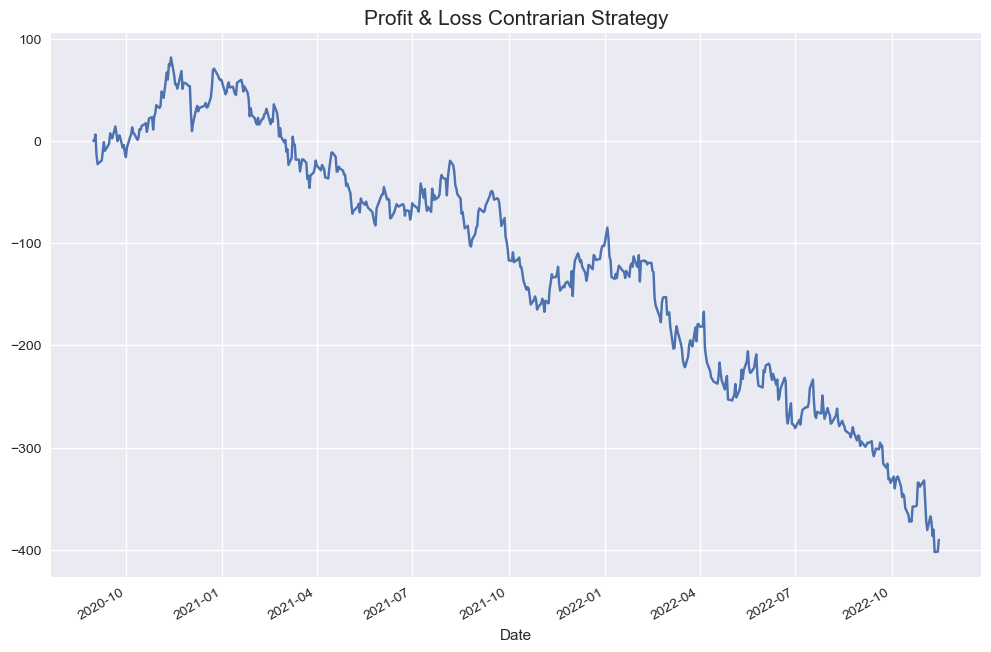

In [37]:
# Plot the cumelative sum
# its bad strategy for the Dow Jones stocks. 
pandl.sum(axis = 1).cumsum().plot(figsize = (12, 8))
plt.title("Profit & Loss Contrarian Strategy", fontsize = 15)
plt.show()

-> Contrarian Strategy __not profitable__. Try the opposite Strategy (Momentum)?

---

# Performance Analysis - Cashflows

- (Short) Sale -> Cash Inflow (positive cf)
- Buy -> Cash Outflow (negative cf)

In [38]:
close.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.039993,253.320007,101.589996,171.820007,142.309998,272.649994,42.220001,83.930000,131.869995,45.119999,...,81.364502,225.529999,111.889999,138.330002,116.040001,312.549988,211.990005,59.270000,38.020000,138.850006
2020-09-01,134.179993,250.860001,102.470001,172.100006,146.050003,281.250000,42.029999,83.080002,133.550003,47.270000,...,80.562981,227.270004,114.839996,138.179993,114.690002,312.829987,213.350006,59.160000,36.759998,147.589996
2020-09-02,131.399994,258.119995,104.400002,174.779999,149.270004,276.690002,42.419998,83.190002,135.389999,49.220001,...,82.948471,231.649994,116.800003,140.509995,117.480003,320.239990,216.479996,60.529999,37.169998,147.679993
2020-09-03,120.879997,247.910004,104.459999,168.770004,146.759995,265.010010,40.950001,82.279999,133.240005,48.389999,...,81.574425,217.300003,112.849998,138.259995,115.349998,316.230011,208.960007,60.610001,37.090000,144.539993
2020-09-04,120.959999,248.399994,105.669998,171.050003,148.179993,254.699997,40.820000,81.930000,131.990005,48.599998,...,81.335876,214.250000,112.400002,137.960007,116.570000,312.000000,204.660004,60.480000,36.889999,142.830002


In [39]:
trades.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0
2020-09-02,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,2.0
2020-09-03,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
2020-09-04,-1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [40]:
# buying means negative cf / selling means positive cf
cf = close.mul(trades).mul(-1) 
cf

# E.g
# in 2020-09-01, we SELL one share of AAPL, so its mean that we have 
# cash inflow of 134$.
# onw day latter (2020-09-02), we BUY 2 share of AAPL, so its mean that we
# have outflow of -262$

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2020-09-01,134.179993,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,47.270000,...,-0.000000,-0.000000,-0.000000,-0.000000,-114.690002,-0.000000,-0.000000,-0.000000,-36.759998,147.589996
2020-09-02,-262.799988,-0.000000,-0.000000,-0.000000,-0.0,-276.690002,-0.0,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,117.480003,-0.000000,-0.000000,-0.000000,37.169998,-295.359985
2020-09-03,-0.000000,-0.000000,104.459999,-0.000000,-0.0,265.010010,-0.0,-0.000000,-0.000000,-48.389999,...,-0.000000,-217.300003,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,60.610001,37.090000,144.539993
2020-09-04,120.959999,-0.000000,-105.669998,171.050003,-0.0,-254.699997,-0.0,-0.000000,-0.000000,-0.000000,...,-0.000000,214.250000,-0.000000,-0.000000,-0.000000,-0.000000,-204.660004,-60.480000,-36.889999,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.000000,-289.649994,-145.860001,-168.740005,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-47.680000,...,101.589996,-0.000000,-0.000000,136.479996,-0.000000,-0.000000,-0.000000,-0.000000,36.889999,-0.000000
2022-11-10,146.869995,-291.010010,-0.000000,-0.000000,-0.0,156.300003,-0.0,181.300003,90.459999,49.959999,...,-203.779999,-0.000000,-0.000000,-141.179993,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2022-11-11,-149.699997,285.019989,-0.000000,-0.000000,-0.0,-157.729996,-0.0,-0.000000,-0.000000,53.139999,...,-0.000000,-0.000000,106.089996,-0.000000,-0.000000,-522.080017,-0.000000,-0.000000,41.259998,-0.000000


In [41]:
# Compute the dayly cf 
cf_daily = cf.sum(axis = 1) # daily aggregated cashflows
cf_daily

# E.g 
# 2020-09-01     26.069984:
# in this day we have positive cashflow, becase we SELL one share.


Date
2020-08-31      0.000000
2020-09-01     26.069984
2020-09-02   -352.636951
2020-09-03    -98.067062
2020-09-04    158.320004
                 ...    
2022-11-09    -99.180000
2022-11-10   -251.139999
2022-11-11   -556.800014
2022-11-14    381.389988
2022-11-15    219.359993
Length: 558, dtype: float64

In [42]:
cf_daily.cumsum() # aggregated cumulative cashflows

# we start with 0 cashflow, we end with -390$ cashflow 

Date
2020-08-31      0.000000
2020-09-01     26.069984
2020-09-02   -326.566967
2020-09-03   -424.634029
2020-09-04   -266.314026
                 ...    
2022-11-09   -183.111927
2022-11-10   -434.251926
2022-11-11   -991.051941
2022-11-14   -609.661953
2022-11-15   -390.301960
Length: 558, dtype: float64

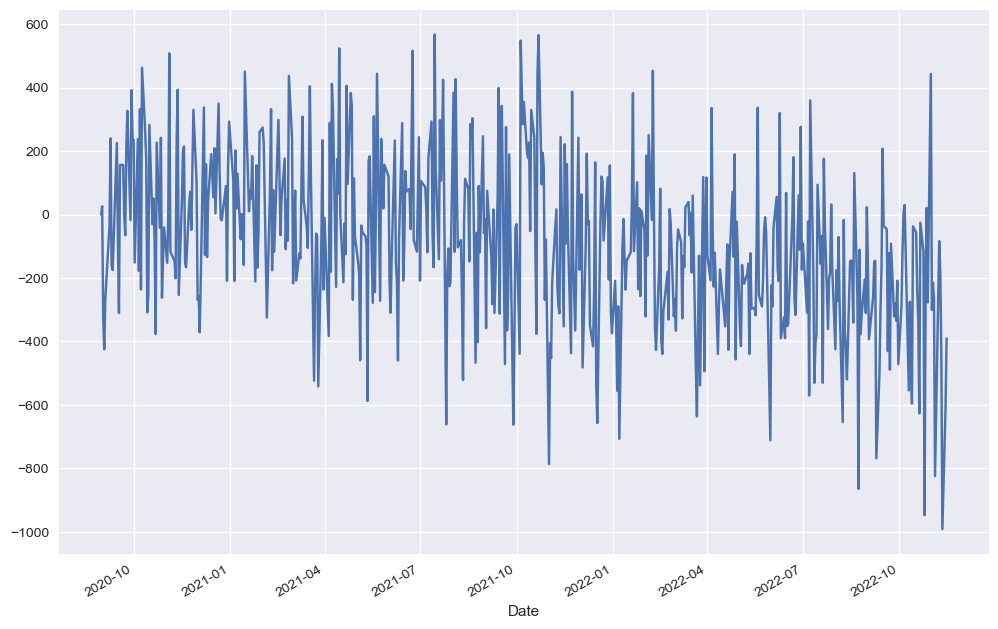

In [43]:
# Plot the cumelative sum of chash flow.
cf_daily.cumsum().plot(figsize = (12, 8))
plt.show()

---

# Trading Costs

In [44]:
# Trading costs per share - estimate 1.1$ 
tc = 1.1

In [45]:
trades

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0
2020-09-02,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,2.0
2020-09-03,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
2020-09-04,-1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-11-10,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-11,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0


In [46]:
(trades != 0).sum(axis = 1) # traded symbols per day

Date
2020-08-31     0
2020-09-01     6
2020-09-02     8
2020-09-03    10
2020-09-04    10
              ..
2022-11-09     8
2022-11-10    10
2022-11-11    10
2022-11-14    10
2022-11-15     6
Length: 558, dtype: int64

In [47]:
# Compute the daily trading costs!
# multiply the sum of trade at symbols per day by the trading cost 
daily_tc = (trades != 0).sum(axis = 1) * tc
daily_tc

Date
2020-08-31     0.0
2020-09-01     6.6
2020-09-02     8.8
2020-09-03    11.0
2020-09-04    11.0
              ... 
2022-11-09     8.8
2022-11-10    11.0
2022-11-11    11.0
2022-11-14    11.0
2022-11-15     6.6
Length: 558, dtype: float64

In [48]:
pandl.sum(axis = 1).sub(daily_tc).cumsum()

Date
2020-08-31       0.000000
2020-09-01      -6.600000
2020-09-02      -9.150000
2020-09-03     -40.384024
2020-09-04     -60.204024
                 ...     
2022-11-09   -6230.911935
2022-11-10   -6235.641923
2022-11-11   -6268.551919
2022-11-14   -6279.221940
2022-11-15   -6274.201960
Length: 558, dtype: float64

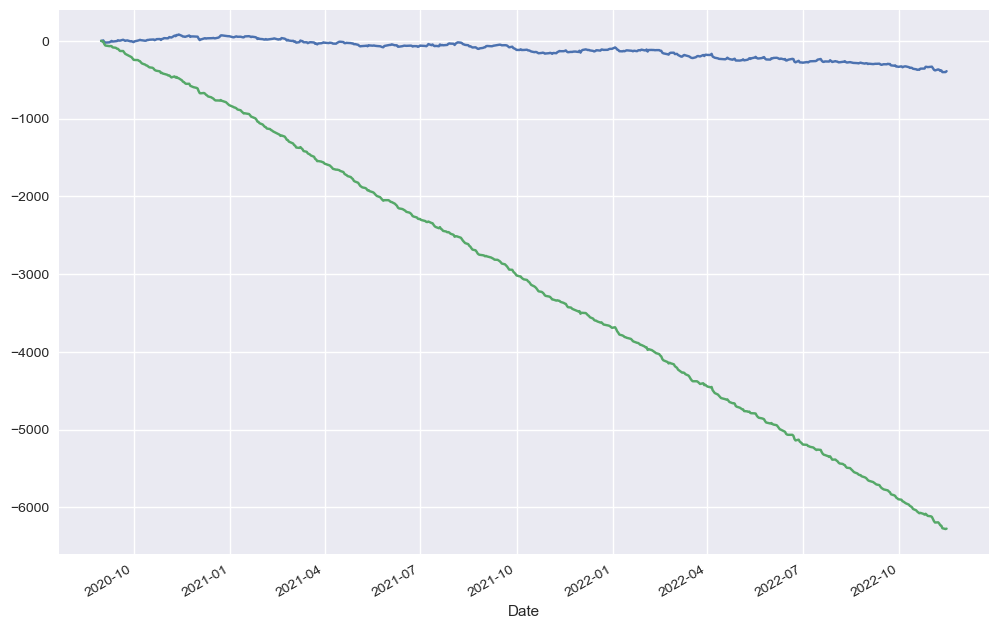

In [49]:
pandl.sum(axis = 1).cumsum().plot(figsize = (12, 8)) # before trading cost
pandl.sum(axis = 1).sub(daily_tc).cumsum().plot()    # after trading costs
plt.show()

- __huge impact__ of Trading Costs. 
- Buying/Selling only __1 share__ is __not cost efficient__

(ignored: short sale costs -> costs of borrowing)

---

# Bringing it all together

Strategy Parameters:
- Contrarian vs. Momentum
- Buying/Selling the best/worst [3] stocks
- equal amount of shares vs. equal trading value
- [1] share each (relative tc reduction)
- daily vs. weekly/monthly
- widen total set of stocks (e.g. 30 vs. 500)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
url = "DJI_Const.csv"

In [52]:
# Create a Contrarian/Momentum back tester class  
class Mom_Contr_Backtester():
    
    def __init__(self, url, strategy = -1, best_worst = 3, shares = 1, tc = 1.1, resample = None):
        """
        url: path to file
        strategy: Contrarian/Momentum (-1/1)
        best_worst: how much instruments in each position? 
        shares: number of stock for each instrument
        tc: trading costs
        resample: change freq
        """
        self.url = url
        self.strategy = strategy
        if strategy == -1:
            self.trend = "Contrarian"
        elif strategy == 1:
            self.trend = "Momentum"
        self.best_worst = best_worst
        self.shares = shares
        self.tc = tc
        self.resample = resample
        self.prepare_data()
    
    def prepare_data(self):
        close = pd.read_csv(url, header = [0,1], index_col = 0, parse_dates = [0]).Close
        close.drop(columns = ["^DJI"], inplace = True)
        if self.resample:
            close = close.resample(self.resample).last()
        self.close = close
        
        self.returns = close.pct_change()
        
    def performance_analysis(self):
        self.get_positions_trades()
        pandl = self.positions.shift() * self.close.diff()
        daily_tc = (self.trades != 0).sum(axis = 1) * self.tc
        self.pandl = pandl.sum(axis = 1).sub(daily_tc).cumsum()
        
        self.pandl.plot(figsize = (12, 8))
        plt.title("Profit & Loss for {}".format(self.trend), fontsize = 15)
        plt.show()
    
    def get_positions_trades(self):
        positions = self.returns.copy()
        positions.apply(self._trading_positions, axis = 1)
        positions.iloc[0] = 0
        positions.iloc[-1] = 0
        
        self.trades = positions.diff().fillna(0)
        self.positions = positions
           
    def _trading_positions(self, series):
        best_stocks = series.nlargest(self.best_worst).index
        worst_stocks = series.nsmallest(self.best_worst).index
        series[best_stocks] = self.strategy * self.shares # Short-Sell best stocks 
        series[worst_stocks] = -self.strategy * self.shares # Buy worst stocks
        no_trade = series.index.drop(best_stocks.append(worst_stocks))
        series[no_trade] = 0 

In [73]:
tester = Mom_Contr_Backtester(url, 
                              strategy = -1, 
                              best_worst = 3, 
                              shares = 5, 
                              tc = 1.1, 
                              resample = None
                             )
tester

In [74]:
tester.close

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.039993,253.320007,101.589996,171.820007,142.309998,272.649994,42.220001,83.930000,131.869995,45.119999,...,81.364502,225.529999,111.889999,138.330002,116.040001,312.549988,211.990005,59.270000,38.020000,138.850006
2020-09-01,134.179993,250.860001,102.470001,172.100006,146.050003,281.250000,42.029999,83.080002,133.550003,47.270000,...,80.562981,227.270004,114.839996,138.179993,114.690002,312.829987,213.350006,59.160000,36.759998,147.589996
2020-09-02,131.399994,258.119995,104.400002,174.779999,149.270004,276.690002,42.419998,83.190002,135.389999,49.220001,...,82.948471,231.649994,116.800003,140.509995,117.480003,320.239990,216.479996,60.529999,37.169998,147.679993
2020-09-03,120.879997,247.910004,104.459999,168.770004,146.759995,265.010010,40.950001,82.279999,133.240005,48.389999,...,81.574425,217.300003,112.849998,138.259995,115.349998,316.230011,208.960007,60.610001,37.090000,144.539993
2020-09-04,120.959999,248.399994,105.669998,171.050003,148.179993,254.699997,40.820000,81.930000,131.990005,48.599998,...,81.335876,214.250000,112.400002,137.960007,116.570000,312.000000,204.660004,60.480000,36.889999,142.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.869995,289.649994,145.860001,168.740005,225.539993,142.059998,43.910000,177.929993,86.750000,47.680000,...,101.589996,224.509995,92.099998,136.479996,182.149994,540.659973,193.929993,37.619999,36.889999,139.470001
2022-11-10,146.869995,291.010010,154.750000,177.580002,232.449997,156.300003,45.660000,181.300003,90.459999,49.959999,...,101.889999,242.979996,99.489998,141.179993,183.300003,544.169983,205.570007,38.520000,38.490002,142.360001
2022-11-11,149.699997,285.019989,154.889999,177.490005,236.490005,157.729996,44.790001,186.460007,95.010002,53.139999,...,97.959999,247.110001,106.089996,140.970001,181.729996,522.080017,205.000000,38.299999,41.259998,142.580002


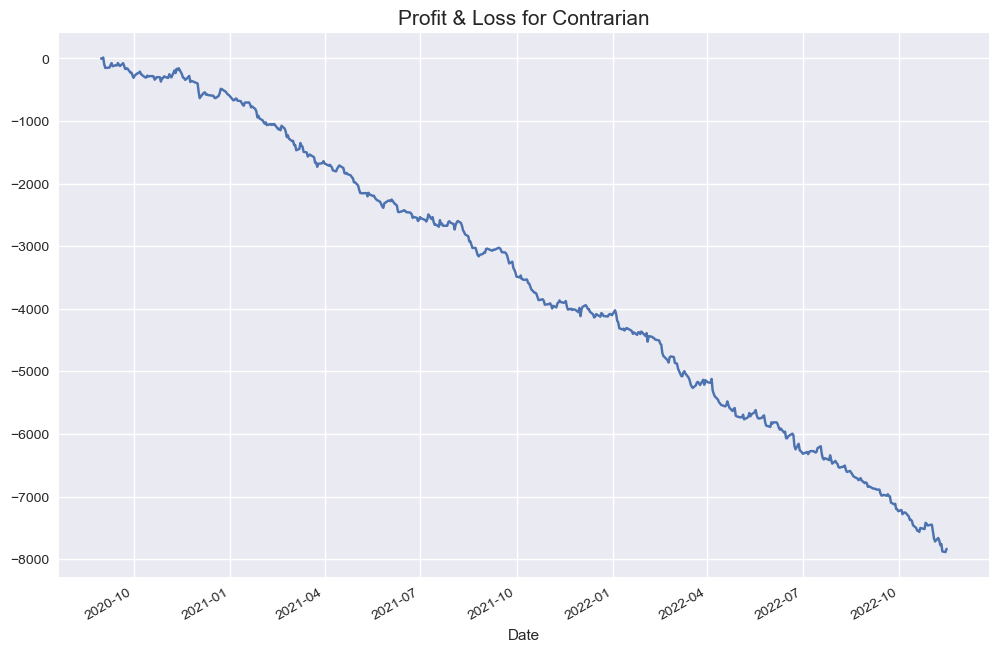

In [75]:
tester.performance_analysis()

In [76]:
tester.pandl

Date
2020-08-31       0.000000
2020-09-01      -6.600000
2020-09-02      15.850000
2020-09-03     -96.320120
2020-09-04    -151.420119
                 ...     
2022-11-09   -7777.359673
2022-11-10   -7757.009614
2022-11-11   -7877.559594
2022-11-14   -7886.909699
2022-11-15   -7835.409800
Length: 558, dtype: float64